<a href="https://colab.research.google.com/github/Chanwoo18/Deeplearning_Practice/blob/main/deeplearning_project_2_BinaryClassfication_RUSmoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/smoking.csv")
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [ ]:
df = pd.get_dummies(df)
df

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,18.0,19.0,27.0,0,0,1,0,1,0,1
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,22.0,19.0,18.0,0,0,1,0,1,0,1
2,2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,21.0,16.0,22.0,0,1,0,1,1,1,0
3,3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,19.0,26.0,18.0,0,0,0,1,1,0,1
4,4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,16.0,14.0,22.0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,14.0,7.0,10.0,1,0,1,0,1,0,1
55688,55681,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,20.0,12.0,14.0,0,0,1,0,1,0,1
55689,55683,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,17.0,11.0,12.0,0,0,1,0,1,1,0
55690,55684,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,20.0,19.0,18.0,0,0,0,1,1,1,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

ID                     0
LDL                    0
tartar_N               0
oral_Y                 0
gender_M               0
gender_F               0
smoking                0
dental caries          0
Gtp                    0
ALT                    0
AST                    0
serum creatinine       0
Urine protein          0
hemoglobin             0
HDL                    0
age                    0
triglyceride           0
Cholesterol            0
fasting blood sugar    0
relaxation             0
systolic               0
hearing(right)         0
hearing(left)          0
eyesight(right)        0
eyesight(left)         0
waist(cm)              0
weight(kg)             0
height(cm)             0
tartar_Y               0
dtype: int64

In [ ]:
df_corr = df.corr()
df_corr_sort=df_corr.sort_values('smoking',ascending=False)
df_corr_sort.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
smoking,0.011476,-0.162557,0.396675,0.302780,0.226259,0.061204,0.063017,-0.023209,-0.018855,0.073109,...,0.059253,0.097338,0.236619,0.103857,1.000000,-0.510340,0.510340,NaN,-0.098655,0.098655
gender_M,0.008657,-0.290095,0.741556,0.574956,0.419568,0.127424,0.125680,-0.009407,-0.011579,0.167289,...,0.095718,0.167903,0.237270,0.084408,0.510340,-1.000000,1.000000,NaN,-0.055473,0.055473
hemoglobin,0.006464,-0.263078,0.539367,0.492970,0.387066,0.095234,0.096119,-0.026116,-0.030943,0.186514,...,0.120575,0.202025,0.223844,0.067984,0.400678,-0.702214,0.702214,NaN,-0.053990,0.053990
height(cm),0.006306,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,...,0.041737,0.126511,0.139720,0.079331,0.396675,-0.741556,0.741556,NaN,-0.055513,0.055513
weight(kg),0.004814,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,...,0.120130,0.250634,0.209625,0.073536,0.302780,-0.574956,0.574956,NaN,-0.059921,0.059921


In [ ]:
df_corr_sort['smoking']

smoking                1.000000
gender_M               0.510340
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar_Y               0.098655
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
Urine protein          0.014267
ID                     0.011476
hearing(right)        -0.018855
hearing(left)         -0.023209
Cholesterol           -0.028548
LDL                   -0.045220
tartar_N              -0.098655
age                   -0.162557
HDL                   -0.178470
gender_F              -0.510340
oral_Y                      NaN
Name: smoking, dtype: float64

In [ ]:
df=df.drop(['ALT','systolic','eyesight(right)','eyesight(left)','AST','Urine protein','ID','hearing(right)','hearing(left)','Cholesterol','LDL'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  55692 non-null  int64  
 1   height(cm)           55692 non-null  int64  
 2   weight(kg)           55692 non-null  int64  
 3   waist(cm)            55692 non-null  float64
 4   relaxation           55692 non-null  float64
 5   fasting blood sugar  55692 non-null  float64
 6   triglyceride         55692 non-null  float64
 7   HDL                  55692 non-null  float64
 8   hemoglobin           55692 non-null  float64
 9   serum creatinine     55692 non-null  float64
 10  Gtp                  55692 non-null  float64
 11  dental caries        55692 non-null  int64  
 12  smoking              55692 non-null  int64  
 13  gender_F             55692 non-null  uint8  
 14  gender_M             55692 non-null  uint8  
 15  oral_Y               55692 non-null 

In [ ]:
X = df.loc[:, df.columns != 'smoking']
y = df['smoking']

In [ ]:
X

,age,height(cm),weight(kg),waist(cm),relaxation,fasting blood sugar,triglyceride,HDL,hemoglobin,serum creatinine,Gtp,dental caries,gender_F,gender_M,oral_Y,tartar_N,tartar_Y
0,40,155,60,81.3,73.0,94.0,82.0,73.0,12.9,0.7,27.0,0,1,0,1,0,1
1,40,160,60,81.0,70.0,130.0,115.0,42.0,12.7,0.6,18.0,0,1,0,1,0,1
2,55,170,60,80.0,86.0,89.0,182.0,55.0,15.8,1.0,22.0,0,0,1,1,1,0
3,40,165,70,88.0,60.0,96.0,254.0,45.0,14.7,1.0,18.0,0,0,1,1,0,1
4,40,155,60,86.0,74.0,80.0,74.0,62.0,12.5,0.6,22.0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,68.0,89.0,99.0,75.0,12.3,0.6,10.0,1,1,0,1,0,1
55688,45,160,50,70.0,62.0,89.0,69.0,73.0,14.0,0.9,14.0,0,1,0,1,0,1
55689,55,160,50,68.5,72.0,88.0,77.0,79.0,12.4,0.5,12.0,0,1,0,1,1,0
55690,60,165,60,78.0,76.0,107.0,79.0,48.0,14.4,0.7,18.0,0,0,1,1,1,0


In [ ]:
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                540       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
modelpath='/content/drive/MyDrive/smoking.hdf5'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [ ]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0,save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size = 500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
67/67 [==============================] - 2s 17ms/step - loss: 0.7278 - accuracy: 0.6057 - val_loss: 0.6036 - val_accuracy: 0.6641
Epoch 2/2000
67/67 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.6654 - val_loss: 0.5769 - val_accuracy: 0.6756
Epoch 3/2000
67/67 [==============================] - 0s 4ms/step - loss: 0.5626 - accuracy: 0.6760 - val_loss: 0.5684 - val_accuracy: 0.6905
Epoch 4/2000
67/67 [==============================] - 0s 4ms/step - loss: 0.5556 - accuracy: 0.6816 - val_loss: 0.5662 - val_accuracy: 0.6958
Epoch 5/2000
67/67 [==============================] - 0s 4ms/step - loss: 0.5514 - accuracy: 0.6822 - val_loss: 0.5561 - val_accuracy: 0.6780
Epoch 6/2000
67/67 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.6884 - val_loss: 0.5480 - val_accuracy: 0.6881
Epoch 7/2000
67/67 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.6947 - val_loss: 0.5434 - val_accuracy: 0.7020
Epoch

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.727788,0.605734,0.603649,0.664063
1,0.578947,0.665410,0.576854,0.675644
2,0.562599,0.675974,0.568440,0.690547
3,0.555632,0.681630,0.566199,0.695843
4,0.551423,0.682199,0.556098,0.677978
...,...,...,...,...
126,0.463411,0.752020,0.476972,0.745040
127,0.465208,0.750643,0.473017,0.744591
128,0.464025,0.752708,0.472442,0.748900
129,0.462619,0.753187,0.470989,0.749618


In [ ]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

In [ ]:
import matplotlib.pyplot as plt

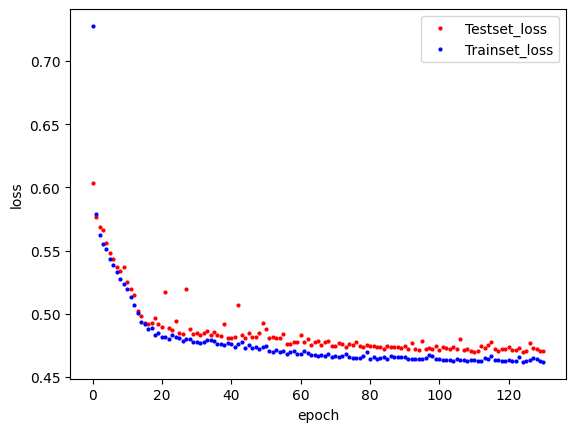

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o",c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o",c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
score=model.evaluate(X_test,y_test)

349/349 [==============================] - 1s 2ms/step - loss: 0.4647 - accuracy: 0.7511
